<a href="https://colab.research.google.com/github/konstihengge/Tensorflow_tutorial/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


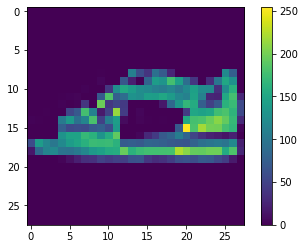

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4948 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3714 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [12]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


#Datensatz laden
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

train_images.shape # 28.28 Pixel mit 60000 Bildern


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[13])
plt.colorbar()                    #Skala auf der rechten Seite
plt.grid(False)                   #kein Grid
plt.show()



#Data Preprocessing
train_images = train_images / 255.0

test_images = test_images / 255.0 #Scale, Wert zwischen 0 und 1 gelegt (wegen Activation Function)


#Buiilding the model

model = keras.Sequential([                                            #am schwierigsten, Daten zu bekommen im richtigen Shape, im richtigen Format...; sequentail: Information form right to left side
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)    
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2) #Dense: alle Neuronen aus dem vorherigen Layer werden mit den Neuronen aus dem nächsten Layer verbunden; 128 Neuronen, wert ist zufällig, sollte allerdings kleinerals 28.28 sein
    keras.layers.Dense(10, activation='softmax') # output layer (3) 10 Neuronen, da es 10 Kleidungsstücke gibt; Softmax: Distribution, alle Neuronen gehen zu einem über und dessen Wert liegt zwischen 0 und 1
])



#Compile the model
model.compile(optimizer='adam',                          #perform the gradient descent   
              loss='sparse_categorical_crossentropy',     #Loss Function, 
              metrics=['accuracy'])                       #Genauigkeit



#Training the model
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

In [13]:
#Evaluate the model

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) #

print('Test accuracy:', test_acc)                                           #Accuracy beim Evaluierung kleiner als beim testen -> Overfitting

313/313 [==============================] - 1s 1ms/step - loss: 0.3585 - accuracy: 0.8715
Test accuracy: 0.8715000152587891


Trouser


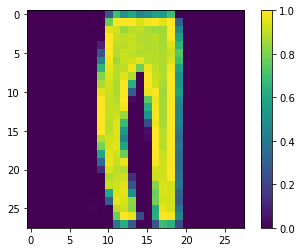

In [22]:
#Make predictions

predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[2])])    #Index des höhchsten Wertes in der Liste hier wird dann noch der Klassenname angegeben

plt.figure()
plt.imshow(test_images[2])
plt.colorbar()                    #Skala auf der rechten Seite
plt.grid(False)                   #kein Grid
plt.show()

Pick a number: 56


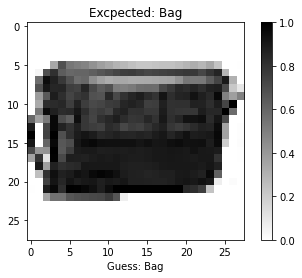

In [29]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
